In [629]:
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

## Run this notebook to get model ready data csv!

If needed, spesify what etfs from final_etf_csv you want to include!

**NOTE** 

This notebook creates the ultimate csv that is used by the model!

In [630]:
include_etf = [
    'FTSE EPRA Nareit Developed Europe TRI',
    'LPX50 Eur TR',
    'MSCI World Net Index EUR',
    'ICE BofA G0BC (Corporate World)', #Global IG  
    'FTSE EMU Government Bond (EGBI) TRI',
    'ICE BofA HW00 (Global HY)',
]

In [631]:
folder_path = 'final_etf_csv'
merged_df = pd.DataFrame()

In [632]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

for file in csv_files:
    etf_name = os.path.splitext(os.path.basename(file))[0]
    
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    
    if 'Price' in df.columns:
        merged_df[etf_name] = df['Price']

merged_df.index = pd.to_datetime(merged_df.index)


In [633]:
merged_df.head()

,EURIBOR 1 Month,FTSE EMU Government Bond (EGBI) TRI,FTSE EPRA Nareit Developed Europe TRI,FTSE EPRA Nareit Developed Europe,FTSECORP,FTSECORPALT,FTWBIGUSDT,GlobalPE,ICE BofA EBL0 (Euro Large Cap Corporate),ICE BofA ER00 (Euro Corporate),...,ICE BofA HW00 (Global HY),LPX50 Eur TR,LPX50PE,MSCI ACWI,MSCI EMU,MSCI World 2,MSCI World Net Index EUR,MSCI World,PE,STOXX600
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-13,3.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6215.2118,NaN,NaN,NaN,NaN,575.396381,NaN,NaN,NaN
2024-11-12,3.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6259.9406,NaN,NaN,NaN,NaN,575.227139,NaN,NaN,NaN
2024-11-11,3.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6342.2389,NaN,NaN,NaN,NaN,576.466173,NaN,NaN,NaN
2024-11-08,3.087,NaN,NaN,1669.22,NaN,NaN,NaN,65.236059,238.102,305.046,...,492.516,6187.4279,6187.4279,805.208156,226.159758,3791.0,570.422641,NaN,NaN,506.63
2024-11-07,3.095,NaN,NaN,1646.53,NaN,NaN,NaN,64.522182,237.669,304.496,...,491.586,6147.7129,6147.7129,798.394201,227.297457,3787.0,566.446016,NaN,6195.5179,509.92


Reversing

In [634]:
merged_df = merged_df.iloc[::-1]

Excluding spesified columns

In [635]:
merged_df = merged_df[include_etf]

In [636]:
merged_df.shape

(8716, 6)

In [637]:
merged_df.head()

,FTSE EPRA Nareit Developed Europe TRI,LPX50 Eur TR,MSCI World Net Index EUR,ICE BofA G0BC (Corporate World),FTSE EMU Government Bond (EGBI) TRI,ICE BofA HW00 (Global HY)
Date,,,,,,
1990-08-23,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-24,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-27,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-28,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-29,NaN,NaN,NaN,NaN,NaN,NaN


In [638]:
def plot_each(merged_df):
    for etf_name in merged_df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_df.index, merged_df[etf_name], label=etf_name)
        plt.title(f"Price Time Series for {etf_name}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()


## Plotting For Each Asset For Good Measure

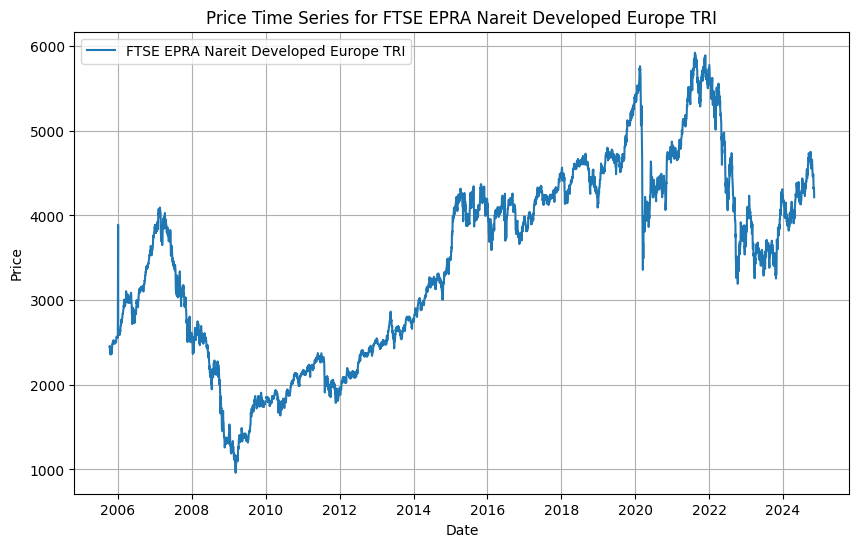

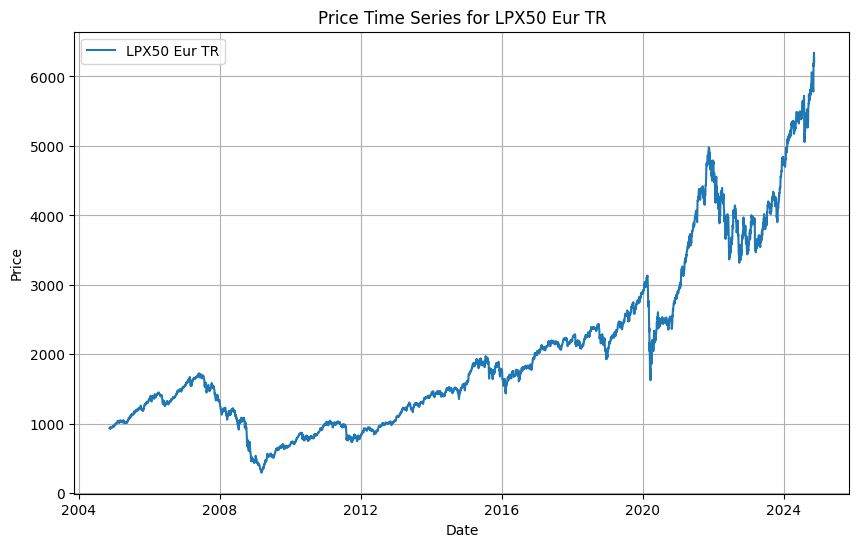

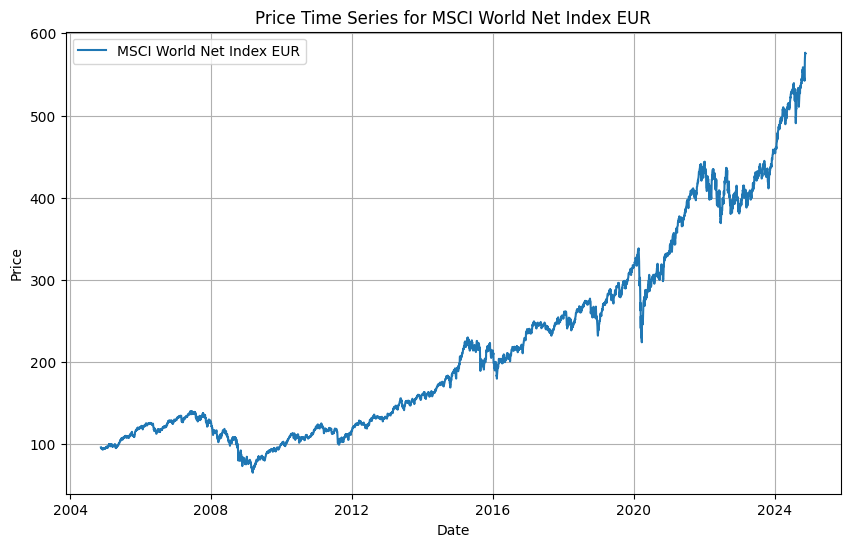

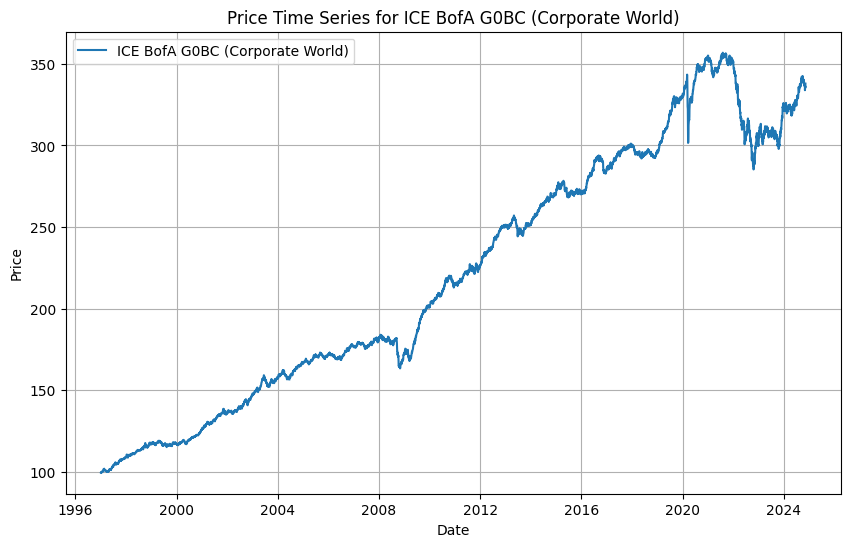

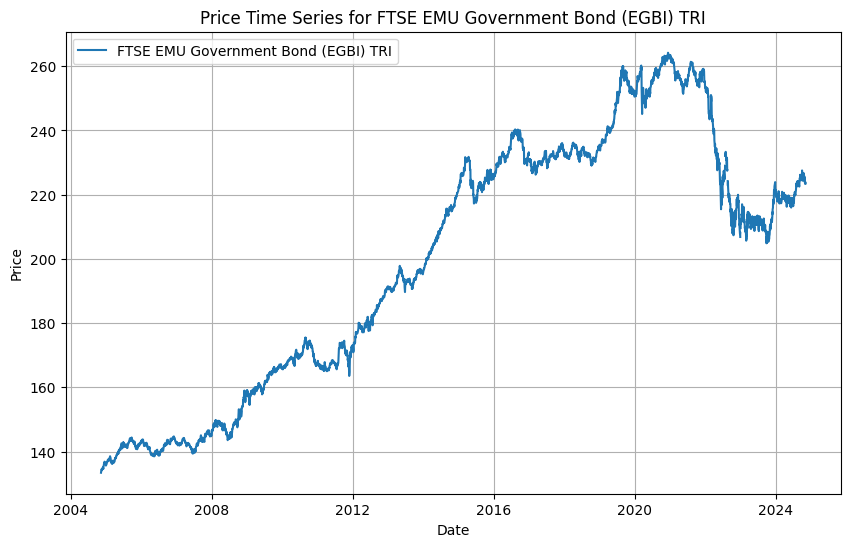

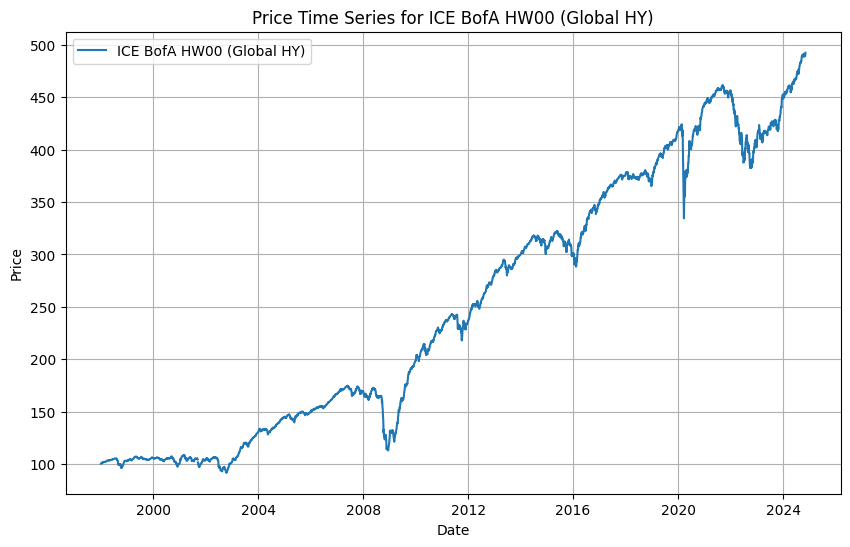

In [639]:
plot_each(merged_df)

## Plotting Everything Together

In [640]:
def all_in_one_plot(df):
    plt.figure(figsize=(12, 8))

    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    plt.title('Time Series of Various Financial Indicators')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.legend(loc="best")

    plt.show()

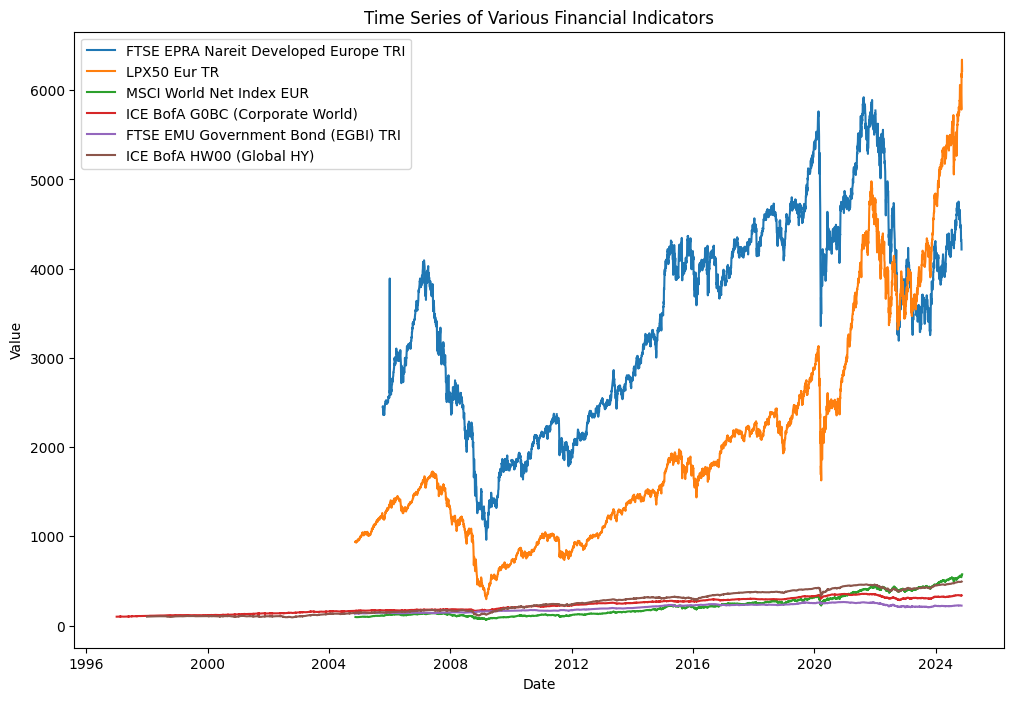

In [641]:
all_in_one_plot(merged_df)

In [642]:
# Find the earliest date where there is data in all columns (no NaNs)
earliest_date_with_data = merged_df.dropna().index.min()

# Filter the DataFrame to keep only rows from this earliest date onwards
merged_df = merged_df[merged_df.index >= earliest_date_with_data]

# Display the earliest date with complete data and the filtered DataFrame
print(f"Earliest date with complete data: {earliest_date_with_data}")
merged_df.head()


Earliest date with complete data: 2005-10-10 00:00:00


,FTSE EPRA Nareit Developed Europe TRI,LPX50 Eur TR,MSCI World Net Index EUR,ICE BofA G0BC (Corporate World),FTSE EMU Government Bond (EGBI) TRI,ICE BofA HW00 (Global HY)
Date,,,,,,
2005-10-10,2450.95,1214.67,110.969,171.392,143.3913,148.214
2005-10-11,2458.87,1222.97,111.477,171.162,143.1166,147.610
2005-10-12,2450.14,1211.16,110.600,170.716,142.8919,146.965
2005-10-13,2404.57,1198.21,110.665,170.318,142.4543,146.462
2005-10-14,2385.68,1200.09,110.334,170.222,142.4629,146.699


This plot shows after we cut to where all indicies have data

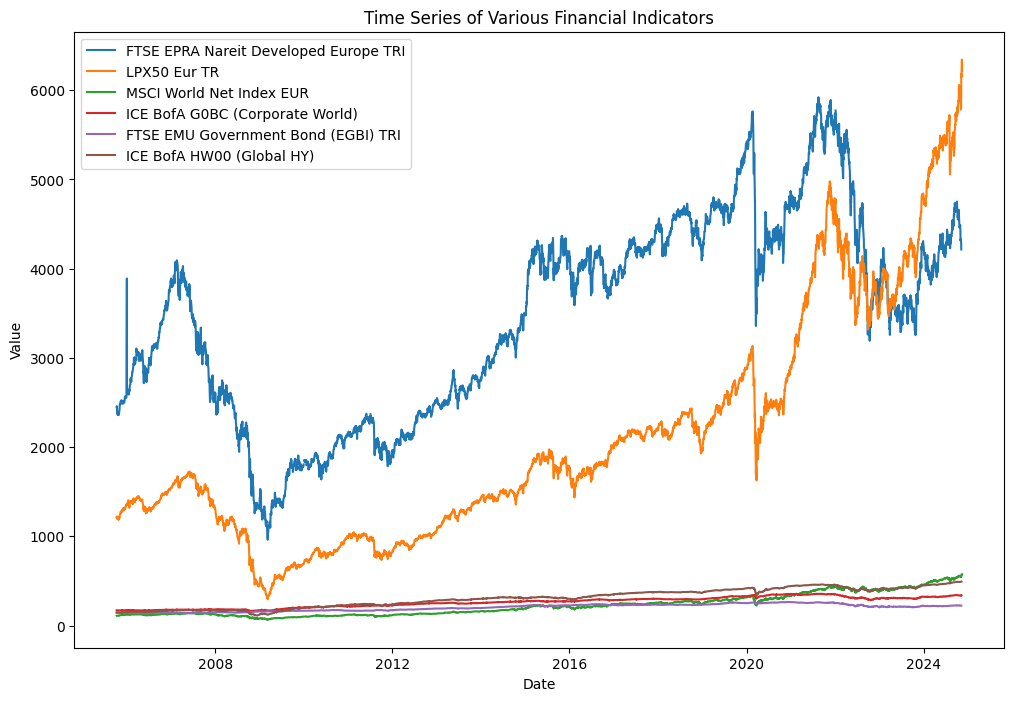

In [643]:
all_in_one_plot(merged_df)

In [644]:
#find earliest nan value for each column

earliest_nan = merged_df.isnull().idxmax()
earliest_nan

FTSE EPRA Nareit Developed Europe TRI   2008-01-29
LPX50 Eur TR                            2010-05-13
MSCI World Net Index EUR                2010-04-14
ICE BofA G0BC (Corporate World)         2005-11-24
FTSE EMU Government Bond (EGBI) TRI     2006-01-02
ICE BofA HW00 (Global HY)               2005-11-24
dtype: datetime64[ns]

In [645]:
#find nan values

nan_values = merged_df.isna().sum()
print(nan_values)

FTSE EPRA Nareit Developed Europe TRI    21
LPX50 Eur TR                             17
MSCI World Net Index EUR                  1
ICE BofA G0BC (Corporate World)          81
FTSE EMU Government Bond (EGBI) TRI      12
ICE BofA HW00 (Global HY)                81
dtype: int64


In [646]:
starting_values = merged_df.iloc[0]

# Normalize each column by dividing all values by the starting value of that column
normalized_df = merged_df / starting_values

# Display the normalized DataFrame
print("Normalized DataFrame:")
normalized_df.head()

Normalized DataFrame:


,FTSE EPRA Nareit Developed Europe TRI,LPX50 Eur TR,MSCI World Net Index EUR,ICE BofA G0BC (Corporate World),FTSE EMU Government Bond (EGBI) TRI,ICE BofA HW00 (Global HY)
Date,,,,,,
2005-10-10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2005-10-11,1.003231,1.006833,1.004578,0.998658,0.998084,0.995925
2005-10-12,0.999670,0.997110,0.996675,0.996056,0.996517,0.991573
2005-10-13,0.981077,0.986449,0.997260,0.993734,0.993465,0.988179
2005-10-14,0.973370,0.987997,0.994278,0.993174,0.993525,0.989778


In [647]:
nan_values = normalized_df.isna().sum()
print(nan_values)

FTSE EPRA Nareit Developed Europe TRI    21
LPX50 Eur TR                             17
MSCI World Net Index EUR                  1
ICE BofA G0BC (Corporate World)          81
FTSE EMU Government Bond (EGBI) TRI      12
ICE BofA HW00 (Global HY)                81
dtype: int64


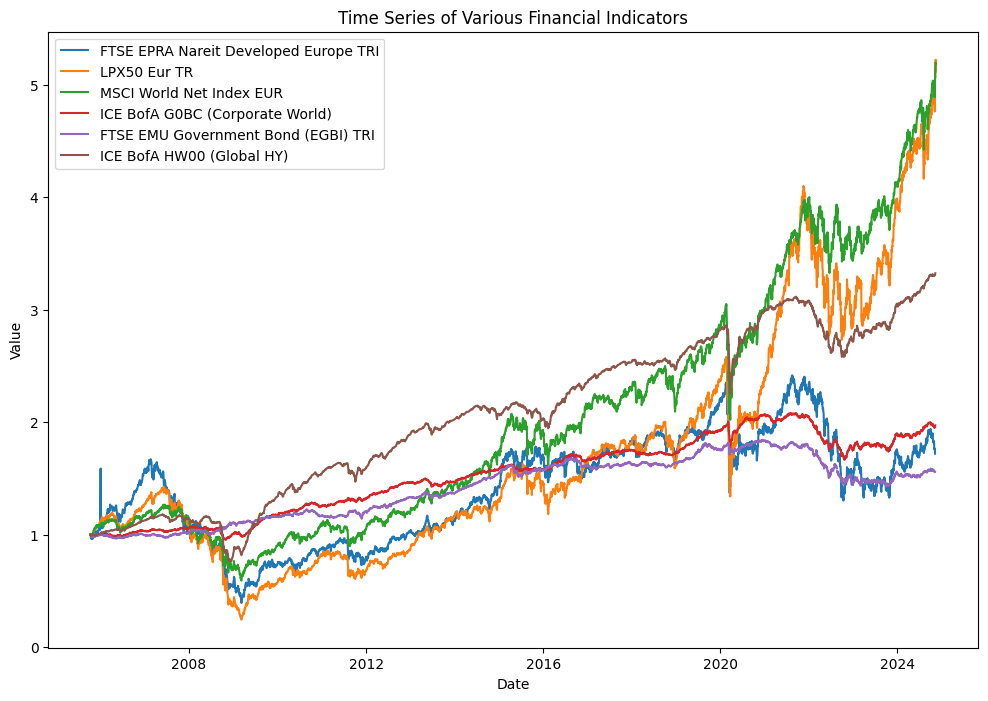

In [648]:
all_in_one_plot(normalized_df)

## Change name of columns

This is done for the sake of the model, spesifically to get the concentration constraints

In [649]:
new_names = [
    'REEL', # FTSE EPRA Nareit Developed Europe TRI
    'PE', # LPX50 Eur TR
    'MSCIWORLD', # MSCI World Net Index EUR
    'IG', # ICE BofA G0BC (Corporate World) Global IG  
    'GOV', # FTSE EMU Government Bond (EGBI) TRI
    'HY' # ICE BofA HW00 (Global HY)
]

normalized_df.columns = new_names

normalized_df.head()

,REEL,PE,MSCIWORLD,IG,GOV,HY
Date,,,,,,
2005-10-10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2005-10-11,1.003231,1.006833,1.004578,0.998658,0.998084,0.995925
2005-10-12,0.999670,0.997110,0.996675,0.996056,0.996517,0.991573
2005-10-13,0.981077,0.986449,0.997260,0.993734,0.993465,0.988179
2005-10-14,0.973370,0.987997,0.994278,0.993174,0.993525,0.989778


## We Have Made The Data --> Converting To Csv

In [650]:
normalized_df.to_csv('final_asset_classes.csv', index=True)

## Making a daily returns df as well

In [651]:
daily_returns = normalized_df.pct_change(fill_method=None).dropna()

### Plotting the Eonia rate

In [652]:
eonia_df = pd.read_csv("final_eonia/eonia_rate.csv", index_col=0, parse_dates=True)
eonia_df = eonia_df.iloc[::-1]
eonia_df = eonia_df.loc['2005-10-10':]
eonia_df.head()

,Rate
Date,
2005-10-10,0.0196
2005-10-11,0.0193
2005-10-12,0.0208
2005-10-13,0.0208
2005-10-14,0.0208


In [653]:
def calculate_percieved_price(df):
    # Assign the number of calendar days (n_i) based on weekends
    df['n_i'] = 1  # Default to 1 day
    df.loc[df.index.weekday == 0, 'n_i'] = 3  # Assign 3 days for Mondays (weekend accrual)

    # Define the number of days in a year according to European money market convention
    days_in_year = 360

    df['Compounding Factor'] = 1 + (df['Rate'] * df['n_i'] / days_in_year)
    
    # Investment Value = Price
    df['Price'] = df['Compounding Factor'].cumprod()

    df = df[['Price', 'Rate']]

    return df

eonia_df = calculate_percieved_price(eonia_df)

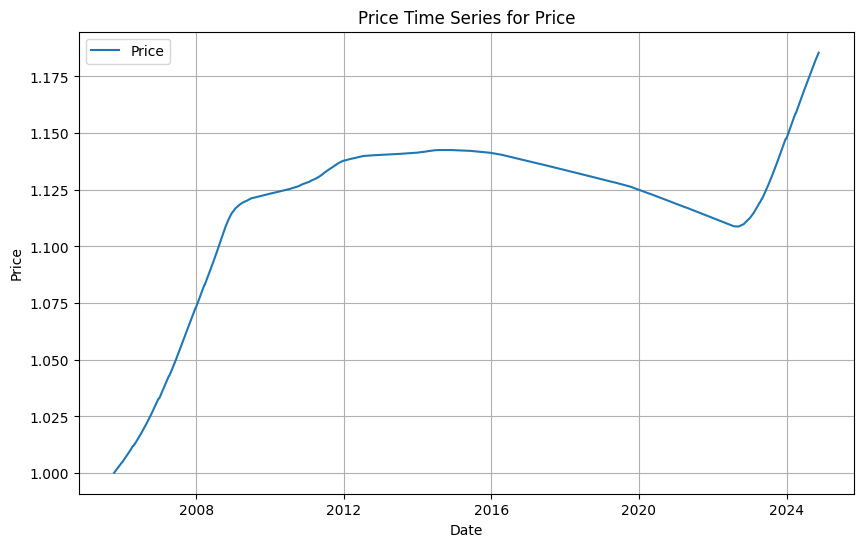

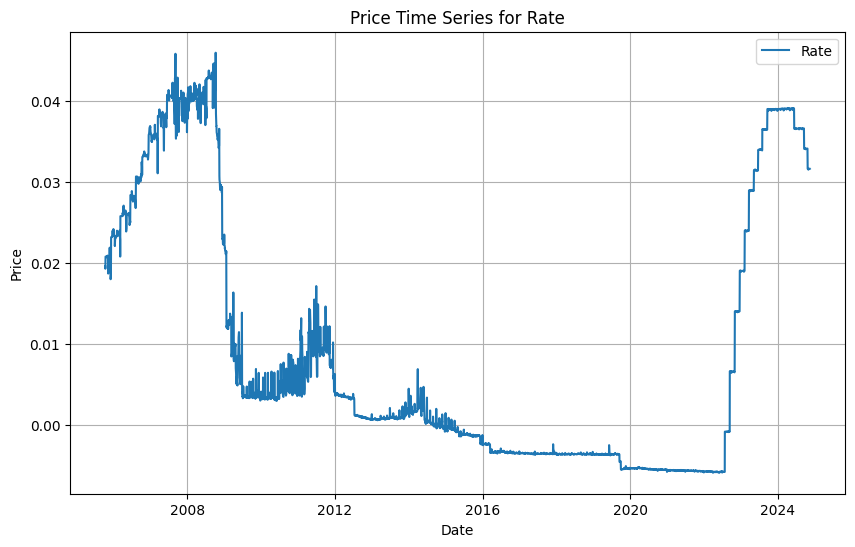

In [654]:
plot_each(eonia_df)

In [655]:
eonia_df = eonia_df['Price'].to_frame()
eonia_df.rename(columns={'Price': 'EONIA'}, inplace=True)

In [656]:
eonia_df.head()

,EONIA
Date,
2005-10-10,1.000163
2005-10-11,1.000217
2005-10-12,1.000275
2005-10-13,1.000333
2005-10-14,1.000390


In [657]:
normalized_df = normalized_df.merge(eonia_df[['EONIA']], left_index=True, right_index=True, how='left')

normalized_df.to_csv('final_asset_classes.csv', index=True)

In [658]:
eonia_daily_return = eonia_df.pct_change(fill_method=None).dropna()

In [659]:
daily_returns = daily_returns.merge(eonia_daily_return[['EONIA']], left_index=True, right_index=True, how='left')

In [660]:
daily_returns.head()

,REEL,PE,MSCIWORLD,IG,GOV,HY,EONIA
Date,,,,,,,
2005-10-11,0.003231,0.006833,0.004578,-0.001342,-0.001916,-0.004075,0.000054
2005-10-12,-0.003550,-0.009657,-0.007867,-0.002606,-0.001570,-0.004370,0.000058
2005-10-13,-0.018599,-0.010692,0.000588,-0.002331,-0.003062,-0.003423,0.000058
2005-10-14,-0.007856,0.001569,-0.002991,-0.000564,0.000060,0.001618,0.000058
2005-10-17,-0.003613,0.000492,0.003290,0.000458,-0.000227,0.005447,0.000173


In [661]:
daily_returns.to_csv('final_daily_returns_asset_classes.csv', index=True)

In [662]:
eonia_daily_return = eonia_daily_return.iloc[::-1]

In [663]:
eonia_daily_return.head()

,EONIA
Date,
2024-11-14,0.000088
2024-11-13,0.000088
2024-11-12,0.000088
2024-11-11,0.000263
2024-11-08,0.000088


In [664]:
output_file_path = 'final_eonia/eonia_rate.csv'
eonia_daily_return[['EONIA']].to_csv(output_file_path, index_label='Date', sep=',')